<h1 align="center">Astro Task</h1>


## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

## Initializations

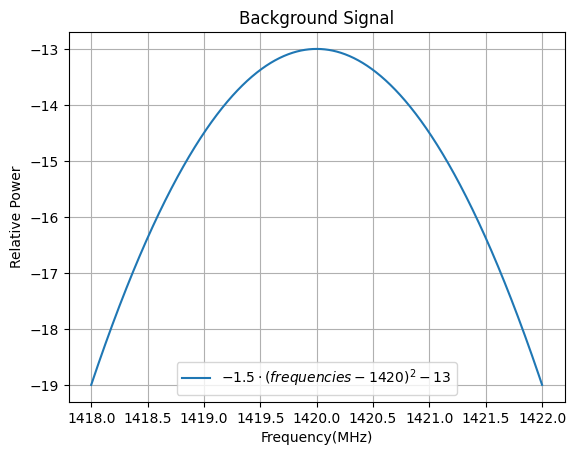

In [2]:
samples = 1024 # low class polyonymal,<5MHz bandwith
frequencies = np.linspace(1418,1422,samples) #from 1418 to 1421   
background_signal = -1.5*(frequencies - 1420)**2 -13 
plt.plot(frequencies,background_signal,label = r'$-1.5 \cdot (frequencies-1420)^2 - 13$')
plt.xlabel("Frequency(MHz)")
plt.ylabel("Relative Power")
plt.title("Background Signal")
plt.legend()
plt.grid(True)
plt.show()

## Add Gaussian Noise

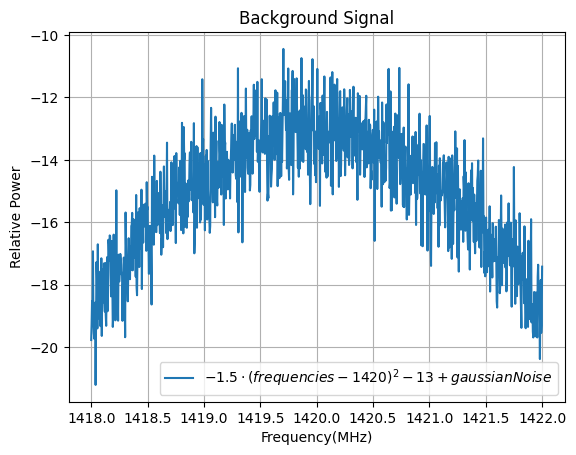

In [3]:
#Gaussian noise = deviation *randn(samples)
deviation = 0.3 # 
gaussian_noise = np.random.randn(samples) # generates random numbers with mean = 0 and variance 1
back_with_noise = background_signal + gaussian_noise # Gaussian noise applies to every single point in the signal
plt.plot(frequencies,back_with_noise,label = r'$-1.5 \cdot (frequencies-1420)^2 - 13 + gaussianNoise$')
plt.xlabel("Frequency(MHz)")
plt.ylabel("Relative Power")
plt.title("Background Signal")
plt.legend()
plt.grid(True)
plt.show()

## Signal in different time segments

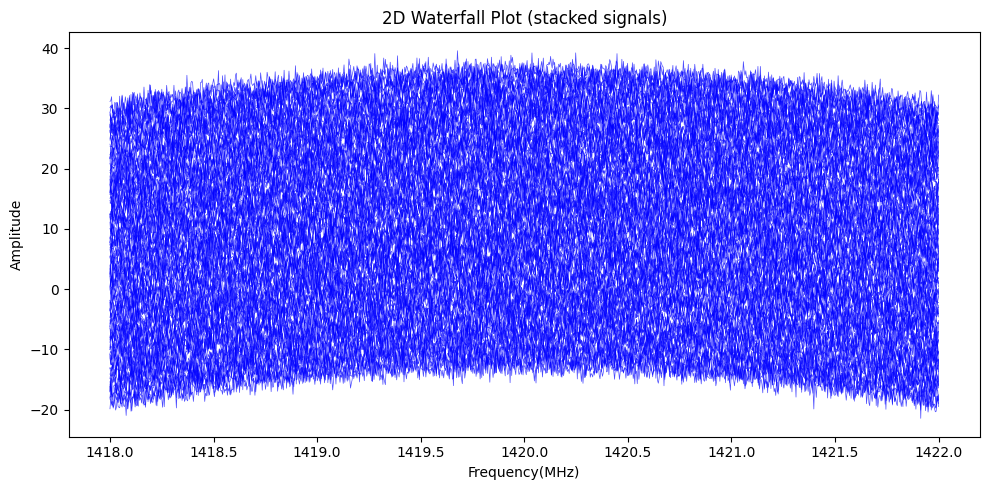

In [7]:
signals = [] #list that saves the signal for every time segment
time_segments = 100
for i in range(time_segments):
    gaussian_noise = np.random.randn(samples) # generates random numbers with mean = 0 and variance 1
    signal = background_signal + gaussian_noise # Gaussian noise applies to every single point in the signal
    signals.append(signal)
signals = np.array(signals) 
x=np.linspace(1,100,samples) #create the x'x which recreates the time segments
plt.figure(figsize=(10,5))
offset=0.5 # a small shift so the signals dont cover each other
for i in range(100):
    plt.plot(frequencies,signals[i,:] + i*offset , color='b' , alpha=0.7 , linewidth=0.5)
plt.xlabel("Frequency(MHz)")
plt.ylabel("Amplitude")
plt.title("2D Waterfall Plot (stacked signals)")
plt.tight_layout()
plt.show()

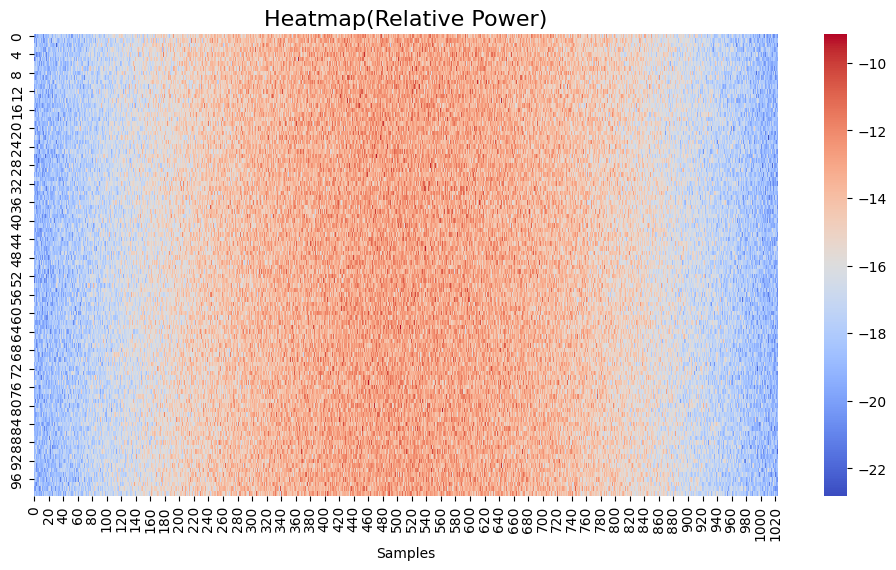

In [5]:
plt.figure(figsize=(12,6))
sns.heatmap(signals,cmap="coolwarm")
plt.title("Heatmap(Relative Power)",fontsize=16)
plt.xlabel("Samples")
plt.show()

# Changes of the background signal to be more realistic

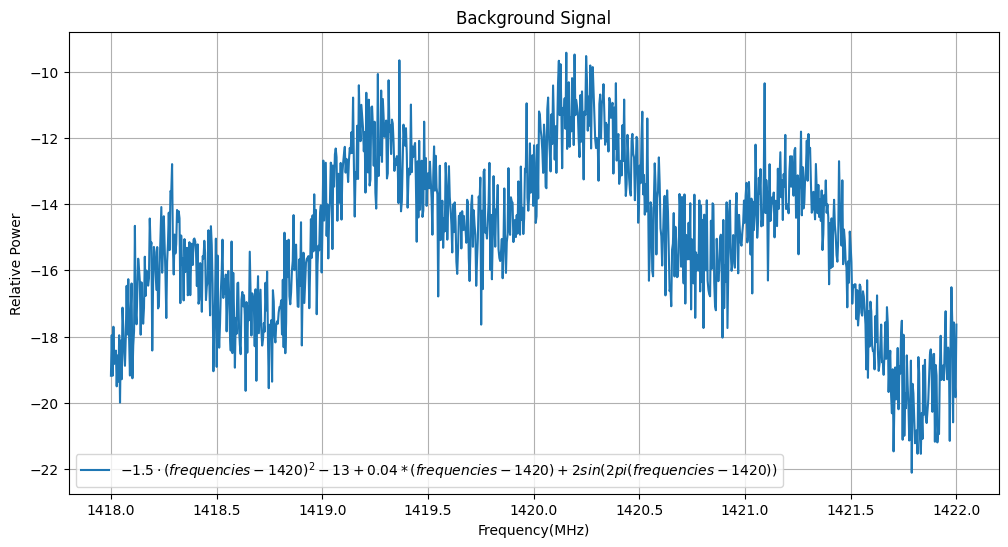

In [6]:
#make a slope in the signal because of 1)
slope = 0.04 * (frequencies-1420)
#we will add another curve component randomly because of 2)
tempSignal = 2*np.sin(2*np.pi * (frequencies-1420))
#We add them all together
finalBackgroundSignal = background_signal+slope+tempSignal
#We add noise
dev = 0.3 # 
noise = np.random.randn(samples) # generates random numbers with mean = 0 and variance 1
finalBackgroundSignalNoisy = finalBackgroundSignal + noise # Gaussian noise applies to every single point in the signal
plt.figure(figsize=(12,6))
plt.plot(frequencies,finalBackgroundSignalNoisy,label = r'$-1.5 \cdot (frequencies-1420)^2 - 13 + 0.04 * (frequencies-1420) + 2sin(2pi(frequencies-1420)) $')
plt.xlabel("Frequency(MHz)")
plt.ylabel("Relative Power")
plt.title("Background Signal")
plt.legend()
plt.grid(True)
plt.show()